# Multiple Linear Regression: Car Price Prediction

## Introduction
Geely Auto, a prominent Chinese car manufacturer, is planning to broaden its market reach by entering the US market. Their strategy includes setting up a local manufacturing unit to produce vehicles domestically, allowing them to compete directly with established American and European car makers. To succeed, it's essential for Geely Auto to understand the factors that influence car pricing in the US, as these may differ considerably from those in China.

## Problem Statement
To gain this understanding, Geely Auto has hired an automobile consulting firm to analyze the key determinants of car prices in the US market. The main goals of this analysis are:

- Identifying the variables that significantly influence car pricing.
- Assessing the extent to which these variables account for variations in car prices.

The consulting firm has assembled an extensive dataset from various market surveys, covering a diverse array of car models available in the American market.

# Business Goal
The purpose of this analysis is to create a model that can predict car prices based on the identified variables. This model will provide Geely Auto's management with insights into the relationship between car prices and different features. With these insights, they will be able to:

- Adjust car designs and business strategies to meet specific pricing targets.
- Gain a comprehensive understanding of pricing dynamics in the new market.

## Type of Analysis
To meet our objectives, we utilized a multiple linear regression analysis on the dataset. This statistical method models the relationship between a single dependent variable (car price) and multiple independent variables (such as engine size, horsepower, city MPG, and highway MPG). By using this technique, we can measure the impact of each feature on car prices and determine how effectively these variables together explain the variations in pricing.

## Step 1: Data Selection and Preprocessing

### a. Data Loading
We began by loading the dataset and examining the first few rows to get a sense of its structure and content.

In [21]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/car-price-prediction/CarPrice_Assignment.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 2: Data Exploration
### 2.1 Overview of Dataset
We began by inspecting the dataset, taking note of the number of rows, columns, and data types present.

In [28]:
# Overview of the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

>The dataset contains 205 entries with 26 columns. The columns include both numerical and categorical data types. 

### 2.2 Summary Statistics
Next, we generated descriptive statistics for the numerical columns to understand their distribution and key metrics.

In [32]:
# Summary statistics for numerical columns
summary_statistics = car_data.describe()
print(summary_statistics)  # Print the results

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [33]:
# Checking for missing values
missing_values = car_data.isnull().sum()
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### b. Column Selection
Next, we identified the relevant columns for our analysis: `enginesize`, `horsepower`, `citympg`, `highwaympg`, `price`. These columns were chosen due to their likely influence on car pricing.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

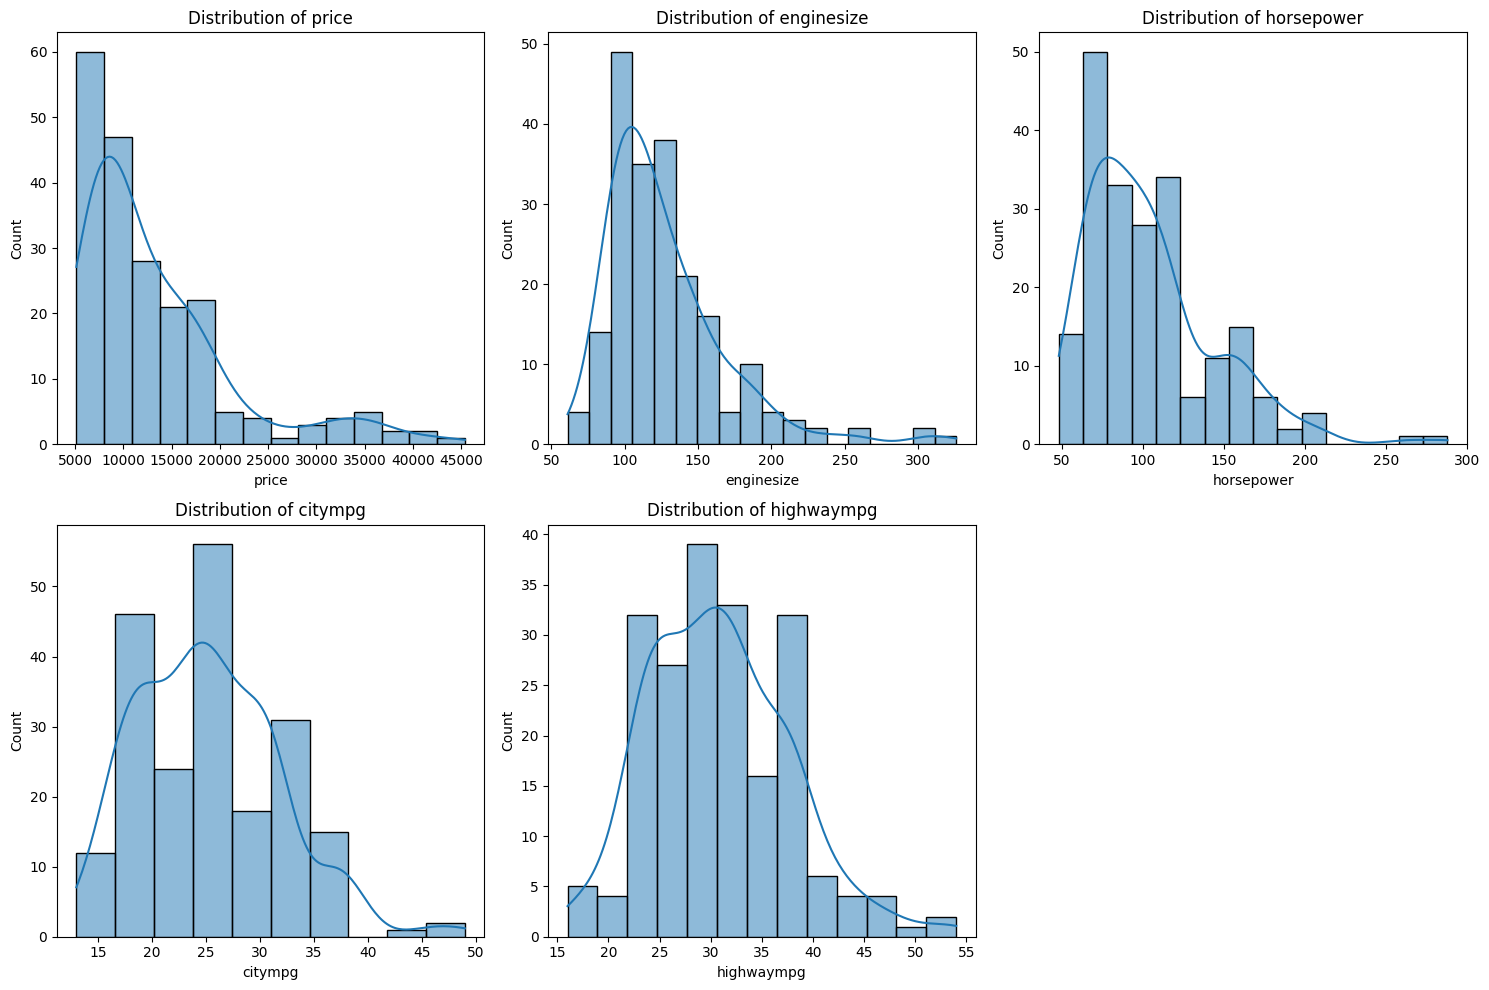

In [31]:
# Distribution of key variables
import seaborn as sns
import matplotlib.pyplot as plt

# List of key variables for distribution plots
key_variables = ['price', 'enginesize', 'horsepower', 'citympg', 'highwaympg']

# Plotting the distribution of key variables
plt.figure(figsize=(15, 10))
for i, variable in enumerate(key_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(car_data[variable], kde=True)
    plt.title(f'Distribution of {variable}')
plt.tight_layout()
plt.show()

## c. Handling Missing Values
To ensure we had a clean dataset for our analysis, we removed any rows with missing values. Additionally, we converted the horsepower column to a numeric format, resolving any non-numeric entries that might interfere with the model training process.